<a href="https://colab.research.google.com/github/Dimisz/handson_ml/blob/main/ch3_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load in the data

In [25]:
import numpy as np
import pandas as pd

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

### Visualize a sample image

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [22]:
random_index = random.randint(0,len(X)-1)
some_digit = X[random_index]
some_label = y[random_index]

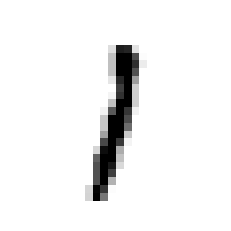

In [23]:
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [24]:
some_label

'1'

In [26]:
# Cast labels from string to int
y = y.astype(np.uint8)

### Split into train/test sets

MNIST dataset is already split into training data set: [:60000], [60000:]

In [27]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [28]:
len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

## Training a Binary Classifier

Try to build a model to only detect 5-s, i.e. is the image '5' or not?

In [29]:
y_train_5 = (y_train == 5) # True for 5s, False for non-5s
y_test_5 = (y_test == 5)

## Model 1: SGDClassifier

In [30]:
from sklearn.linear_model import SGDClassifier

In [32]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
sgd_clf.predict([some_digit])

array([False])

### Cross-Validation

#### Custom kfold

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [36]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


#### using cross_val_score

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

## Dummy classifier that always predicts 'not 5'

In [38]:
from sklearn.base import BaseEstimator

In [39]:
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [40]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])